# ch_1 Convolutional Neural Network

이전 챕터들에서 딥러닝 기본 구조에 대해서 배워보았습니다. 리니어 레이어와 비선형 activation 함수들을 끼워넣어 층층이 쌓은 구조였습니다. 그런데 이를 이미지 처리 분야에 적용하기 위해서는 이미지를 일렬로 펼쳐주어야 했고, 많은 양의 파라미터를 사용해야 했습니다. 이번 챕터에서는 이미지 데이터 처리에 많이 사용되는 Convolutional Neural Network에 대해서 배워보겠습니다.

## Motivation

CNN이라고 줄여서 부르며, 이미지 인식 분야에 특화된 신경망 구조입니다. 기본적인 아이디어는 뇌의 시신경이 동작하는 방식에서 출발합니다. 고양이 뇌에 전극을 꽂고, 이미지를 보여주며 뇌의 어느 부분이 활성화 되는지를 실험하였습니다. 그 결과, 이미지에 모든 뉴런들이 반응하는 것이 아니라, 특정한 영역만 반응한다는 것을 알게 되었습니다. 즉, 원을 보여주었을 때 A라는 영역이 활성화 되었다면, 네모를 보여주었을 때는 B라는 영역이 활성화 되는 것이었습니다. 이 아이디어를 기존 컴퓨터 비전 분야에서 사용되던 Convolution이라는 개념과 결합시켜서 탄생한 것이 CNN입니다.

![스크린샷 2023-08-07 오후 3.35.00.png](https://storage.googleapis.com/data-analytics-camp/week11_deeplearning_cv/ch1/1.png)

In [1]:
# 인간의 시신경이 작동하는 방식에서 모티브 따옴

## Convolution

Convolution은 딥러닝이 등장하기 이전에도 컴퓨터 비전 분야에서 사용되던 기법이었습니다. 이는 이미지에 행렬 형태의 필터를 곱해주어 특정 피쳐를 뽑아내는 기법입니다. 아래 예시를 보면  (3x3) 크기의 필터(커널)을 만들고, 이를 이미지의 특정 영역과 모두 곱한 다음 더해줍니다. 아래 예시에서는(1\*2+ 2\*4 + 3\*9 + ... -5\*1 + 2\*1) = 51이 됩니다.

![스크린샷 2023-08-07 오후 3.50.22.png](https://storage.googleapis.com/data-analytics-camp/week11_deeplearning_cv/ch1/2.png)

In [2]:
# 컨볼루션 필터가 핵심 
# 컨볼루션 필터 (노랑) 

이런 컨볼루션 연산을 슬라이딩 하며 적용하면 새로운 이미지를 얻을 수 있습니다. 

![conv.gif](https://storage.googleapis.com/data-analytics-camp/week11_deeplearning_cv/ch1/3.gif)

In [3]:
# 곱셈 결과가 새로운 이미지가 되는데 
# 이미지로부터 어떤 특징을 뽑아내고 싶을 때 사용하는 것

실제 이미지에 컨볼루션 연산을 적용해보면서 이해해 보겠습니다.

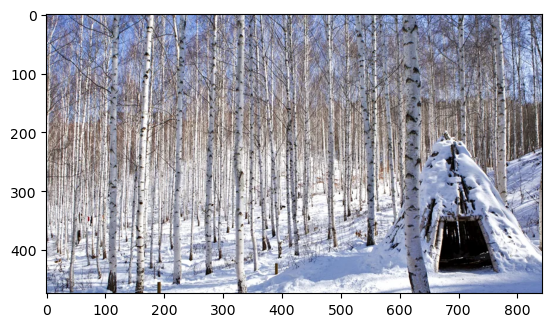

In [6]:
import cv2
from matplotlib import pyplot as plt

def show_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
img = cv2.imread("./data/forest.png")
show_img(img)

### 컨볼루션을 이용한 테두리 추출

테두리를 추출하는 컨볼루션 필터를 한번 적용해보겠습니다. 이는 중심 픽셀에만 가중치를 두고, 주변 픽셀들은 모두 -1을 곱해줍니다. 만일, 중심 픽셀이 주변 픽셀과 확연히 다른 값을 가지는 테두리의 경우에는 값을 가지고, 주변 픽셀과 동일한 값을 가지는 픽셀은 0이 됩니다.

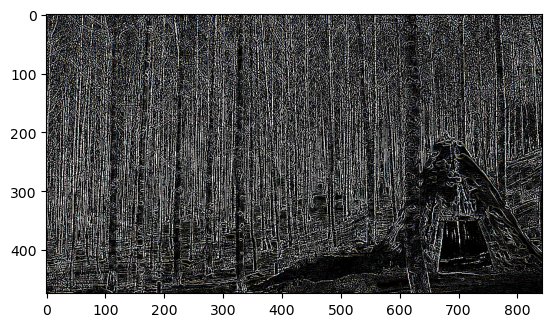

In [10]:
import numpy as np

kernel = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])
filtered_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
show_img(filtered_img)

In [ ]:
# 주변 것들은 감소시키고 가운데 부분만 강조해서 테두리만 뽑아오기

### 컨볼루션을 이용한 가로, 세로 테두리 추출

컨볼루션 필터에 따라서 가로 테두리, 세로 테두리를 각각 추출할 수도 있습니다. 여기서는 각 필터별로 이미지가 왜 이렇게 변환 되었는지에 주목하기 보다는, 필터에 따라서 이미지의 다른 특징들이 추출되는구나 정도만 이해하고 넘어가겠습니다.

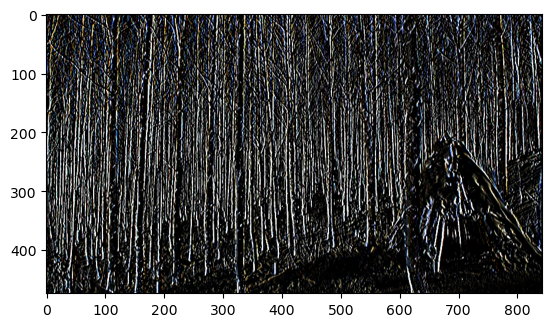

In [11]:
kernel = np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
])
filtered_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
show_img(filtered_img)

In [12]:
# 세로 테두리만 뽑아오기

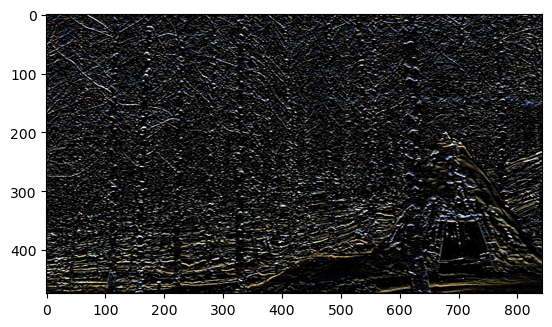

In [13]:
kernel = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])
filtered_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
show_img(filtered_img)

In [14]:
# 가로 테두리만 뽑아오기

## Convolution Neural Network

### Convolution & Activation
Convolution Neural Network는 linear layer 대신에 Convolution Layer를 사용합니다. 그리고 오류 역전파를 이용해서 loss가 최소화 되도록 컨볼루션 필터 값들을 학습시키는 것입니다. 그 결과로 이미지로부터 서로 다른 특징들을 추출하는 컨볼루션 필터들을 얻을 수 있게 되고, 이 정보 값들을 활용하여 최종적으로 이미지를 분류하는 등의 테스크를 수행하게 됩니다.

먼저 (32 x 32 x 3) 크기의 이미지가 주어졌다고 가정하겠습니다. 여기에 (5 x 5 x 3) 크기의 컨볼루션 연산을 적용하면 (28 x 28 x 1) 크기의 피쳐맵을 얻을 수 있습니다. (자세한 연산은 생략하겠습니다.)

![스크린샷 2023-08-07 오후 4.32.24.png](https://storage.googleapis.com/data-analytics-camp/week11_deeplearning_cv/ch1/4.png)

6개의 각기 다른 컨볼루션 필터를 적용하면 (28 x 28 x 6) 크기의 피쳐맵을 얻을 수 있습니다.

![스크린샷 2023-08-07 오후 4.33.14.png](https://storage.googleapis.com/data-analytics-camp/week11_deeplearning_cv/ch1/5.png)

이렇게 얻은 피쳐맵은 ReLU와 같은 활성화 함수를 한번 통과시켜 줍니다. 그리고 다시 컨볼루션 필터를 적용할 수 있습니다. 이 과정을 층층이 쌓아준 것이 Convolution Neural Network입니다.

![스크린샷 2023-08-07 오후 4.34.12.png](https://storage.googleapis.com/data-analytics-camp/week11_deeplearning_cv/ch1/6.png)

In [15]:
# 필터 값을 weight값으로 둔 게 cnn (filter들을 학습시킨다)
# concolution 필터를 거쳐서 결과가 나오는데 서로 다른 여러 개의 필터를 사용하면 피처맵이 여러 개 쌓이서
# 이 피처맵에 다시 필터를 거쳐서 

### Padding

컨볼루션 연산을 수행하면 필연적으로 출력되는 피쳐맵의 가로, 세로가 원본 이미지보다 작아질 수 밖에 없습니다. 이를 방지하기 위해서 0으로 채워진 값을 이미지 바깥에 추가하는 기법을 padding, 혹은 zero-padding이라고 부릅니다.

![스크린샷 2023-08-07 오후 5.17.00.png](https://storage.googleapis.com/data-analytics-camp/week11_deeplearning_cv/ch1/7.png)

In [16]:
# 입출력 크기 동일하게 하기 위해

### Stride

Stride란 컨볼루션 연산 시에 건너 뛰는 간격을 의미합니다. stride 크기에 따라서도 출력되는 피쳐맵의 크기가 달라지지만, 자세한 연산은 생략하겠습니다. 아래 예시는 padding을 추가한 상태에서 3x3 필터를 stride 2로 설정하여 컨볼루션 연산을 수행하는 것입니다.

![stride.gif](https://storage.googleapis.com/data-analytics-camp/week11_deeplearning_cv/ch1/8.gif)

In [17]:
# 돋보기 # 2 stride는 한 번 하고 2칸 건너뛰고 다시 적용하고의 반복

### Pooling

Pooling은 Activation Layer를 거친 피쳐맵의 정보를 압축해주는 레이어입니다. 아래 예시를 보면, 2x2 크기의 윈도우로 나누어서 가장 큰 값만 추출해줍니다. 이를 MaxPooling이라고 부릅니다. 만약 평균을 취해준다면 AveragePooling이라고 부릅니다.

![스크린샷 2023-08-07 오후 4.48.16.png](https://storage.googleapis.com/data-analytics-camp/week11_deeplearning_cv/ch1/9.png)

In [18]:
# 이미지 쪼개서 각각의 영역에서 가장 큰 값만 뽑아오는 것

Convolution + Activation 사이에 Pooling을 넣어주면 아래와 같은 구조가 됩니다.

![스크린샷 2023-08-07 오후 4.53.33.png](https://storage.googleapis.com/data-analytics-camp/week11_deeplearning_cv/ch1/10.png)

In [20]:
# 보통의 cnn구조
# conv - relu - pooling 반복

### Fully Connected Layer

Convolution, Activation, Pooling을 거치면서 이미지로부터 특징을 추출하게 됩니다. 이 특징을 가지고 최종적으로 분류 테스크를 수행해야 하는데, 이 때, Fully Connected Layer가 사용됩니다. 이전 레이어들을 거치면서 추출된 특징들을 일렬로 펼친 다음, linear layer를 한번 통과시켜주고, softmax를 취해주어 예측 값을 내리게 됩니다. Cross Entrophy를 이용하여 loss를 계산한 다음, 이를 역전파 시켜주면 전체 신경망을 학습시킬 수 있습니다.

### Convolution Neural Network
Convolution Layer, Activation, Pooling을 층층이 쌓아준 뉴럴 네트워크의 구조입니다.

![스크린샷 2023-08-07 오후 3.31.54.png](https://storage.googleapis.com/data-analytics-camp/week11_deeplearning_cv/ch1/11.png)

## Convolution Neural Network Result

CNN은 결국 이미지로부터 서로 다른 특징을 추출해내는 필터들을 학습시키는 기법이라고 했습니다. 그렇다면 실제로 학습이 완료된 CNN의 각 필터들은 이미지로부터 어떤 특징들을 뽑아낼까요?

![image.png](https://storage.googleapis.com/data-analytics-camp/week11_deeplearning_cv/ch1/12.png)

In [21]:
# raw data를 추상화시켜서 패턴을 추정하는 것

신경망 앞단에 위치한 필터들은 이미지로부터 색상이나 형태, 선 등의 low-level 정보를 추출합니다. 그리고 컨볼루션을 거칠 수록 정보가 점점 추상화되어 해당 이미지에 대한 의미 정보를 표현하게 됩니다. 이렇게 추상화된 정보를 가지고 마지막에 linear layer가 분류 작업을 수행하게 됩니다.

## 정리

이번 챕터에서는 이미지 처리 분야에 널리 사용되는 Convolutional Neural Network의 기본 개념에 대해서 알아보았습니다. 다음 챕터에서는 본격적으로 CNN을 이용하여 이미지 분류 모델을 학습시켜 보겠습니다.